In [1]:
import warnings 
warnings.filterwarnings('ignore')

**Exploratory Data Analysis for Machine Learning (IBM)**

*Elgun Alishev*
*December 2022*

---------------------------------

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy.stats as stats 
from scipy.stats import chi2_contingency


**About the data**
The data originally came from the **Kaggle** dataset under name *"Students Performance in Exams"*, this dataset consist of the marks by the students in different subjects.

In [3]:
data = pd.read_csv('exams.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


\
**Data exploration plan** \
This analysis is aimed at obtaining primary information about the data, as well as to determine the features that affect the passing of the exam. 
1. Data Overview 
2. Data Cleaning and Feature Engineering 
3. Hypothesis Testing 


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**Data dictionary**  \
\
*Value name  - Description - Type* \
***gender*** - Gender - String  \
***race/ethnicity*** - Race/Ethnicity - String  \
***parental level of education*** - Parental Level - String  \
***lunch*** - Lunch - String  \
***test preparation course*** - Test Preparation - String  \
***math score*** - Math Score - Integer  \
***reading score*** - Reading Score - Integer  \
***writing score*** - Writing Score - Integer  

**Data overview**

Dataset has 1000 rows and 8 columns. \
Missing values are equal to zero.


In [5]:
category_columns = data.select_dtypes(include=object).columns.tolist()
(pd.DataFrame(data[category_columns].melt(var_name='column', value_name='value').value_counts())
.rename(columns={0: 'counts'})
.sort_values(by=['column', 'counts']))

counts
column                      value                     
gender                      female                 483
                            male                   517
lunch                       free/reduced           348
                            standard               652
parental level of education master's degree         70
                            bachelor's degree      112
                            some high school       191
                            high school            202
                            associate's degree     203
                            some college           222
race/ethnicity              group A                 79
                            group E                131
                            group B                205
                            group D                262
                            group C                323
test preparation course     completed              335
                            none                   665

The table above shows the number of categorical values in each column. Based on the table, the following conclusions can be drawn.\
1. There are more *men* than *women*. 
2. Most students receive *standard* meals. 
3. Most of the students graduated from college type "some colleges". 
4. According to etnicity and race, people belonging to *group C* are often found. 
5. It can also be concluded that 335 out of 1000 successfully *completed* the exam.

<AxesSubplot: xlabel='test preparation course', ylabel='count'>

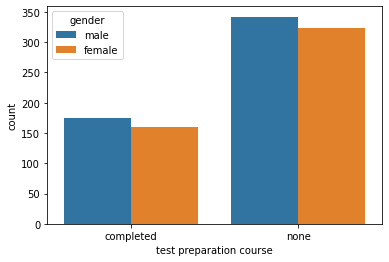

In [6]:
sns.countplot(data = data, x = "test preparation course", hue = 'gender')

This bar chart show that, amount of males that completed and non completed course more than females, but this may be due to the equal amount of genders.

<AxesSubplot: xlabel='test preparation course', ylabel='count'>

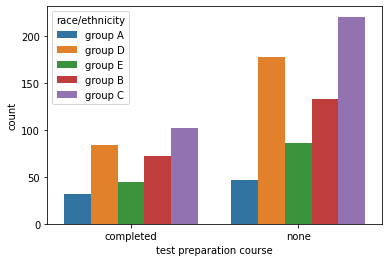

In [7]:
sns.countplot(data = data, x = "test preparation course", hue = 'race/ethnicity')

This bar chart show that, amount of etnicity Group C than completed and non completed course more than others group, but this may be due to the equal amount of genders.

<AxesSubplot: xlabel='count', ylabel='test preparation course'>

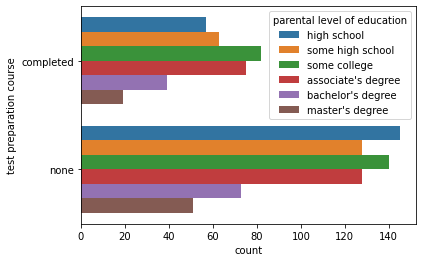

In [8]:
sns.countplot(data = data, y = "test preparation course", hue = 'parental level of education')

This bar chart show that, among the students who passed the exam, the majority had graduated from *some colleges* or had an *associate's degree*. Among the students who did not pass the exam, the majority are students who have completed *high school* and *some colleges*.

<AxesSubplot: xlabel='count', ylabel='test preparation course'>

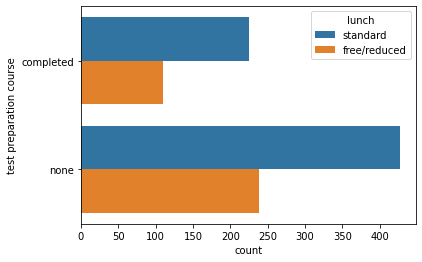

In [9]:
sns.countplot(data = data, y = "test preparation course", hue = 'lunch')

This bar chart show that, amount of student that have *standart lunch*  than others in both result, but this may be due to the equal amount of genders.

These graphs show that the above categorical data refers to the analysis for passing the exam.

**Numeric data overview**

In [10]:
data.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


Data show the maximum score from each steps is 100, and minimum equals respectively 13 for math, 27 for reading and 15 for writing. It is mean *math* turned out to be difficult among the exams

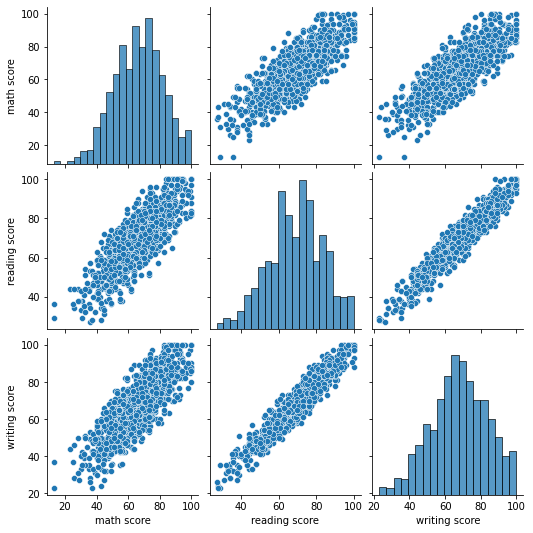

In [11]:
sns.pairplot(data)

**Numeric data**
1. *math* and *writing* score have a normal distrubution
2. Not big outliers
3. No strong linear relationship between data.

<AxesSubplot: >

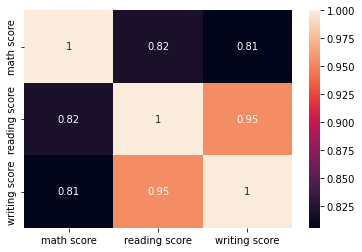

In [12]:
corr = data.corr()
sns.heatmap(corr, annot=True)

But most likely these are confounding variables, that is, although they have a positive correlation, they are not causes among themselves.

----------------------------

**Hypothesis testing**

*alpha = 0.05*

The hypothesis is that the number of completed and failures significantly depends on gender.

$ 𝐻\_{0} $: Completed exam proportions are not significantly different across the different gender. \
$ 𝐻\_{A} $: Completed exam proportions are different across the different gender.

In [13]:
df= pd.crosstab(data.gender, data['test preparation course'])
df

test preparation course,completed,none
gender,,
female,160,323
male,175,342


In [14]:
chi2, p_val, dof, exp_freq = chi2_contingency(df, correction = False)
print(' chi-square statistic: {}, \n p_value: {} ,\n degree of freedom: {} , \n expected frequencies: {} '.format(chi2, p_val, dof, exp_freq))

 chi-square statistic: 0.05856663693421538, 
 p_value: 0.8087759416808448 ,
 degree of freedom: 1 , 
 expected frequencies: [[161.805 321.195]
 [173.195 343.805]] 


In [15]:
if (p_val < 0.05):
    print('Reject the null hypothesis. The completed exam proportions are significantly different across the different gender')
else:
    print('Accept the null hypothesis. The completed exam proportions are not significantly different across the different gender')

Accept the null hypothesis. The completed exam proportions are not significantly different across the different gender


**We accept null hypothesis**

-------------------------------

The hypothesis is that the number of completed and failures significantly depends on etnicity group.

$ 𝐻\_{0} $: Completed exam proportions are not significantly different across the different etnicity. \
$ 𝐻\_{A} $: Completed exam proportions are different across the different etnicity.

In [16]:
df= pd.crosstab(data['race/ethnicity'], data['test preparation course'])
df

test preparation course,completed,none
race/ethnicity,,
group A,32,47
group B,72,133
group C,102,221
group D,84,178
group E,45,86


In [17]:
chi2, p_val, dof, exp_freq = chi2_contingency(df, correction = False)
print(' chi-square statistic: {}, \n p_value: {} ,\n degree of freedom: {} , \n expected frequencies: {} '.format(chi2, p_val, dof, exp_freq))

 chi-square statistic: 2.8040376496159216, 
 p_value: 0.5911359441755221 ,
 degree of freedom: 4 , 
 expected frequencies: [[ 26.465  52.535]
 [ 68.675 136.325]
 [108.205 214.795]
 [ 87.77  174.23 ]
 [ 43.885  87.115]] 


In [18]:
if (p_val < 0.05):
    print('Reject the null hypothesis. The completed exam proportions are significantly different across the different etnicity')
else:
    print('Accept the null hypothesis. The completed exam proportions are not significantly different across the different etnicity')

Accept the null hypothesis. The completed exam proportions are not significantly different across the different etnicity


**We accept null hypothesis**

------------------------------------------------

The hypothesis is that the number of completed and failures significantly depends on level of education.

$ 𝐻\_{0} $: Completed exam proportions are not significantly different across the different level of education. \
$ 𝐻\_{A} $: Completed exam proportions are different across the different level of education.

In [19]:
df= pd.crosstab(data['parental level of education'], data['test preparation course'])
df

test preparation course,completed,none
parental level of education,,
associate's degree,75,128
bachelor's degree,39,73
high school,57,145
master's degree,19,51
some college,82,140
some high school,63,128


In [20]:
chi2, p_val, dof, exp_freq = chi2_contingency(df, correction = False)
print(' chi-square statistic: {}, \n p_value: {} ,\n degree of freedom: {} , \n expected frequencies: {} '.format(chi2, p_val, dof, exp_freq))

 chi-square statistic: 6.1695029607590035, 
 p_value: 0.2900732619199559 ,
 degree of freedom: 5 , 
 expected frequencies: [[ 68.005 134.995]
 [ 37.52   74.48 ]
 [ 67.67  134.33 ]
 [ 23.45   46.55 ]
 [ 74.37  147.63 ]
 [ 63.985 127.015]] 


In [21]:
if (p_val < 0.05):
    print('Reject the null hypothesis. The completed exam proportions are significantly different across the different level of education')
else:
    print('Accept the null hypothesis. The completed exam proportions are not significantly different across the different level of education')

Accept the null hypothesis. The completed exam proportions are not significantly different across the different level of education


**We accept null hypothesis**

----------------------------------------------------------

The hypothesis is that the number of completed and failures significantly depends on type of lunch.

$ 𝐻\_{0} $: Completed exam proportions are not significantly different across the different type of lunch. \
$ 𝐻\_{A} $: Completed exam proportions are different across the different type of lunch.

In [22]:
df= pd.crosstab(data['lunch'], data['test preparation course'])
df

test preparation course,completed,none
lunch,,
free/reduced,110,238
standard,225,427


In [23]:
chi2, p_val, dof, exp_freq = chi2_contingency(df, correction = False)
print(' chi-square statistic: {}, \n p_value: {} ,\n degree of freedom: {} , \n expected frequencies: {} '.format(chi2, p_val, dof, exp_freq))

 chi-square statistic: 0.8565613915436132, 
 p_value: 0.35470275417091013 ,
 degree of freedom: 1 , 
 expected frequencies: [[116.58 231.42]
 [218.42 433.58]] 


In [24]:
if (p_val < 0.05):
    print('Reject the null hypothesis. The completed exam proportions are significantly different across the different type of lunch')
else:
    print('Accept the null hypothesis. The completed exam proportions are not significantly different across the different type of lunch')

Accept the null hypothesis. The completed exam proportions are not significantly different across the different type of lunch


**We accept null hypothesis**

-----------------------

The hypothesis is that the count of math, reading and writing score significantly depends on gender.

$ 𝐻\_{0}:\mu\_{1}-\mu\_{2} = 0 $ There is no difference between the math, reading and writing score of male and scores of female. \
$ 𝐻\_{A}:\mu\_{1}-\mu\_{2} \ne 0 $ There is a difference between the math, reading and writing score of male and scores of female.


In [25]:
female=data.loc[data.gender=="female"]
male=data.loc[data.gender=="male"]

In [26]:
math_score_f = female['math score']
reading_score_f = female['reading score']
writing_score_f = female['writing score']

math_score_m = male['math score']
reading_score_m = male['reading score']
writing_score_m = male['writing score']

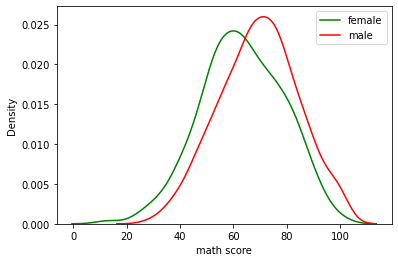

In [27]:
f, ax = plt.subplots(1, 1)
sns.distplot(math_score_f,color='green',hist=False,label='female')
sns.distplot(math_score_m,color='red',hist=False, label='male')
ax.legend()

In [28]:
alpha=0.05
t_value1, p_value1 = stats.ttest_ind(math_score_m, math_score_f)
print("p_value1 = ", p_value1)
print("\n")
if p_value1 <alpha:
    print("Reject the null hypothesis.There is a difference between the math score of male and math score of female.")
else:
    print("Accept the null hypothesis.There is a no difference between the math score of male and math score of female.")

p_value1 =  1.461496757143407e-10


Reject the null hypothesis.There is a difference between the math score of male and math score of female.


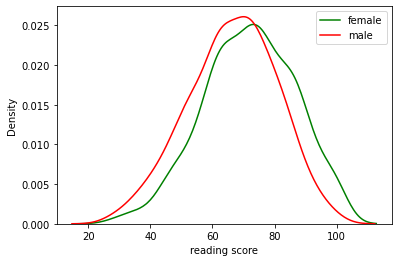

In [29]:
f, ax = plt.subplots(1, 1)
sns.distplot(reading_score_f,color='green',hist=False,label='female')
sns.distplot(reading_score_m,color='red',hist=False,label='male')
ax.legend()

In [30]:
alpha=0.05
t_value1, p_value1 = stats.ttest_ind(reading_score_m, reading_score_f)
print("p_value1 = ", p_value1)
print("\n")
if p_value1 <alpha:
    print("Reject the null hypothesis.There is a difference between the reading score of male and reading score of female.")
else:
    print("Accept the null hypothesis.There is a no difference between the reading score of male and reading score of female.")

p_value1 =  1.5776254495378691e-09


Reject the null hypothesis.There is a difference between the reading score of male and reading score of female.


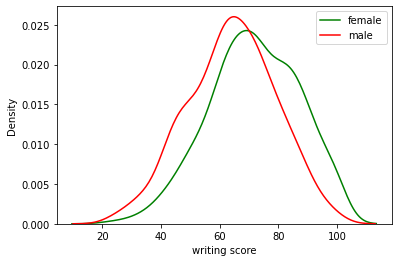

In [31]:
f, ax = plt.subplots(1, 1)
sns.distplot(writing_score_f,color='green',hist=False, label = 'female')
sns.distplot(writing_score_m,color='red',hist=False, label = 'male')
ax.legend()

In [32]:
alpha=0.05
t_value1, p_value1 = stats.ttest_ind(writing_score_m, writing_score_f)
print("p_value1 = ", p_value1)
print("\n")
if p_value1 <alpha:
    print("Reject the null hypothesis.There is a difference between the writing score of male and writing score of female.")
else:
    print("Accept the null hypothesis.There is a no difference between the writing score of male and writing score of female.")

p_value1 =  2.9267319154280456e-15


Reject the null hypothesis.There is a difference between the writing score of male and writing score of female.


-------------------------------------------

**Further data engineering and analyzing**

Here you can see that categorical values do not have such a strong impact on passing the exam. However, there is still a weak link between them. But for predicting these data are weak. But in the end it was uploaded that the number of points in math, writing and reading is intense from the gender of the person. As studies measure, men score more than women, but less in reading and writing. Of course, these are the initial fees for more accurate data. In the future, we can consider the dependence of scores on other categorical features.

**Conclusion**

As shown in the result of analysis, regression might not be a good fit to this data set. However, it might be good enough as a baseline model. Also amount of data not enough to make sure the conclusions drawn.

--------------
----------